In [ ]:
# Reuters dataset, a set of short newswires and their topics, published
# by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
# are 46 different topics; some topics are more represented than others, but each topic
# has at least 10 examples in the training set.

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print("train data length",len(train_data))
print("test data length",len(test_data))

train data length 8982
test data length 2246


In [ ]:
#  deocde into text
# word_index = reuters.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
# train_data[0]])
# train_labels[10]

In [ ]:
#  now labelencode our data

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#  one hot label encoding

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
#  build in label encoding method
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [ ]:
#  now model building
#  we use softmax for multi-class probability ditriburtui

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# Model compiling

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# using 1000 sempli for validation

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
#  Model Training

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 3.1916 - accuracy: 0.4130 - val_loss: 1.7112 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4807 - accuracy: 0.6941 - val_loss: 1.3063 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0841 - accuracy: 0.7804 - val_loss: 1.1254 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8453 - accuracy: 0.8238 - val_loss: 1.0219 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6530 - accuracy: 0.8673 - val_loss: 0.9563 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5282 - accuracy: 0.8929 - val_loss: 0.9281 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4181 - accuracy: 0.9128 - val_loss: 0.8942 - val_accuracy: 0.8180
Epoch 8/20
16

In [ ]:
# Ploting the traing and validation loss

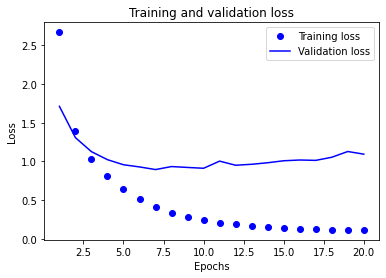

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#  Ploting training and validation accuracy

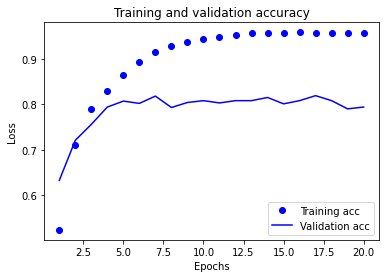

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#  now retaining our model

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 64ms/step - loss: 3.2366 - accuracy: 0.3855 - val_loss: 1.8145 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 1s 45ms/step - loss: 1.5511 - accuracy: 0.6981 - val_loss: 1.3512 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.1127 - accuracy: 0.7716 - val_loss: 1.1622 - val_accuracy: 0.7400
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8615 - accuracy: 0.8108 - val_loss: 1.0683 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6669 - accuracy: 0.8583 - val_loss: 1.0104 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5458 - accuracy: 0.8826 - val_loss: 0.9527 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4247 - accuracy: 0.9094 - val_loss: 0.9637 - val_accuracy: 0.7950
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9987009167671204, 0.7809438705444336]

In [ ]:
# This approach reaches an accuracy of ~80%. With a balanced binary classification
# problem, the accuracy reached by a purely random classifier would be 50%. But in
# this case it’s closer to 19%, so the results seem pretty good, at least when compared to
# a random baseline:

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19634906500445237

In [ ]:
# Prediction

In [ ]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [ ]:
predictions

array([[1.30900835e-05, 3.88216395e-05, 1.76656977e-04, ...,
        1.24486896e-05, 1.44463456e-06, 5.12496217e-06],
       [8.50477163e-03, 6.27539009e-02, 6.25091568e-02, ...,
        1.29764003e-03, 8.00024338e-07, 6.87683278e-05],
       [7.26309558e-03, 7.75756717e-01, 1.32640777e-03, ...,
        2.32967827e-03, 6.12733420e-04, 1.14758572e-04],
       ...,
       [1.99379301e-05, 3.12532589e-04, 1.99749207e-04, ...,
        4.59054827e-05, 8.24905419e-06, 1.57576651e-05],
       [3.30324605e-04, 7.81915244e-03, 1.76329864e-03, ...,
        3.67353001e-04, 5.66637682e-05, 8.80382649e-05],
       [7.59696413e-04, 3.70159447e-01, 5.52941579e-03, ...,
        1.26279204e-03, 1.97405447e-04, 1.01732949e-04]], dtype=float32)